In [1]:
from mapbuilder import MapBuilder
from invprojection import  RBFinv, Pinv_ilamp, NNinv_torch
from sklearn.preprocessing import maxabs_scale, MinMaxScaler
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE, MDS
from sklearn.linear_model import LogisticRegression
from umap import UMAP
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from time import time


/home/peyote/workspace/map_builder/mapbuilder/tools.py:66: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
/home/peyote/workspace/map_builder/mapbuilder/tools.py:140: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
/home/peyote/workspace/map_builder/mapbuilder/tools.py:186: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'n

In [2]:
# X, y = make_blobs(n_samples=800, centers=4, n_features=10, random_state=42)
# X = maxabs_scale(X)
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X = np.array(X)
y = np.array(y)
X = X.astype('float32') / 255.
y = y.astype('int')
X, _, y, _ = train_test_split(X, y, train_size=2000, test_size=2000, random_state=420)
# clf = LogisticRegression()
# clf.fit(X, y)

/home/peyote/.conda/envs/tf3.11/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


device:  cuda:0
Epoch 1/150, Loss: 0.12717670
Epoch 2/150, Loss: 0.07273169
Epoch 3/150, Loss: 0.06957589
Epoch 4/150, Loss: 0.06762671
Epoch 5/150, Loss: 0.06440386
Epoch 6/150, Loss: 0.06237194
Epoch 7/150, Loss: 0.06092371
Epoch 8/150, Loss: 0.05879913
Epoch 9/150, Loss: 0.05738519
Epoch 10/150, Loss: 0.05604295
Epoch 11/150, Loss: 0.05492026
Epoch 12/150, Loss: 0.05390913
Epoch 13/150, Loss: 0.05304832
Epoch 14/150, Loss: 0.05229094
Epoch 15/150, Loss: 0.05154419
Epoch 16/150, Loss: 0.05079625
Epoch 17/150, Loss: 0.05003497
Epoch 18/150, Loss: 0.04934127
Epoch 19/150, Loss: 0.04879398
Epoch 20/150, Loss: 0.04829693
Epoch 21/150, Loss: 0.04782942
Epoch 22/150, Loss: 0.04738961
Epoch 23/150, Loss: 0.04696343
Epoch 24/150, Loss: 0.04655082
Epoch 25/150, Loss: 0.04616666
Epoch 26/150, Loss: 0.04583457
Epoch 27/150, Loss: 0.04552434
Epoch 28/150, Loss: 0.04519379
Epoch 29/150, Loss: 0.04489525
Epoch 30/150, Loss: 0.04458993
Epoch 31/150, Loss: 0.04431020
Epoch 32/150, Loss: 0.04402240
E

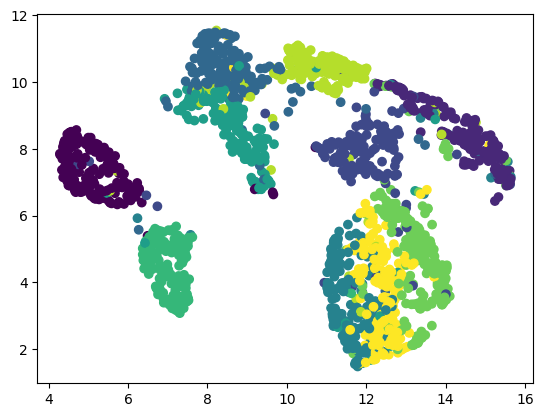

In [3]:
P = UMAP(n_components=2)

# X2D = TSNE(n_components=2).fit_transform(X)
X2D = P.fit_transform(X)
plt.scatter(X2D[:, 0], X2D[:, 1], c=y)
Pinv = NNinv_torch(dims=[128, 256, 512, 1024])
# Pinv = NNinv_torch()
# Pinv = RBFinv()
# Pinv = Pinv_ilamp()
Pinv.fit(X2D, X)



In [4]:
builder = MapBuilder(Pinv, None, X2d=X2D, X=X, y=y, scaling=0.9, P=P)

n_classes: 10


Loss: 1.4843: 100%|██████████| 150/150 [00:02<00:00, 62.26it/s]


fast strategy
threshold_abs: 32.950042724609375
2.1677510738372803
fast strategy
threshold_abs: 34.28297729492188
0.8804025650024414


Text(0.5, 1.0, 'new')

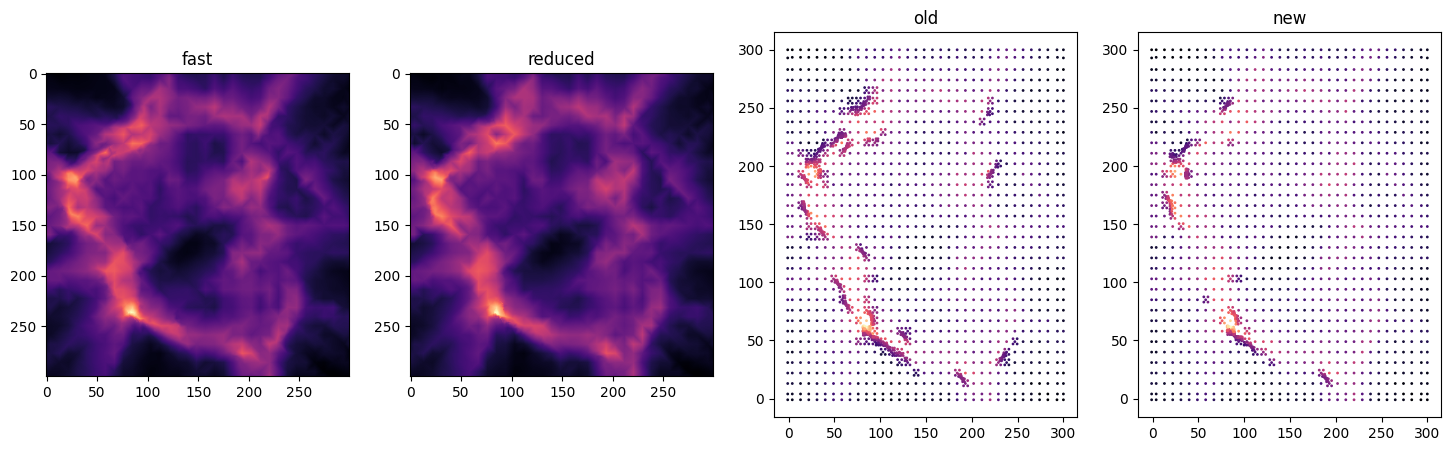

In [5]:

time1 = time()
label, value_old, sparse_old = builder.get_map(content='gradient', resolution=300, fast_strategy=True, threshold=0.2)
time2 = time()
print(time2-time1)
label, value, sparse = builder.get_map(content='gradient_reduced', resolution=300, fast_strategy=True, threshold=0.2)
time3 = time()
print(time3-time2)

fig, ax = plt.subplots(1, 4, figsize=(18, 5))
ax[0].imshow(value_old, cmap='magma')
ax[0].set_title('fast')
ax[1].imshow(value, cmap='magma')
ax[1].set_title('reduced')
ax[2].scatter(sparse_old[:, 0], sparse_old[:, 1], c=sparse_old[:,2], cmap='magma', s=4, marker='.')
ax[2].set_title('old')
ax[3].scatter(sparse[:, 0], sparse[:, 1], c=sparse[:,2], cmap='magma', s=4, marker='.')
ax[3].set_title('new')

In [6]:
grid_list = range(100, 1500, 200)

time_dummy = []
time_fast = []
time_reduced = []

content = 'gradient'



    

In [7]:
for grid in grid_list:
    print(f'grid size {grid}')
    t0 = time()
    builder.get_map(content='gradient_reduced', resolution=grid, fast_strategy=True, threshold=0.2)
    t1 = time()
    time_reduced.append(t1-t0)

grid size 100
fast strategy
threshold_abs: 34.28297729492188
grid size 300
fast strategy
threshold_abs: 34.28297729492188
grid size 500
fast strategy
threshold_abs: 34.28297729492188
grid size 700
fast strategy
threshold_abs: 34.28297729492188
grid size 900
fast strategy
threshold_abs: 32.33697204589844
grid size 1100
fast strategy
threshold_abs: 34.462954711914065
grid size 1300
fast strategy
threshold_abs: 30.85364990234375


In [8]:
# for grid in grid_list:
#     print(f'grid size {grid}')
#     t0 = time()
#     builder.get_map(content=content, resolution=grid, fast_strategy=True, threshold=0.2)
#     t1 = time()
#     time_fast.append(t1-t0)

In [9]:
for grid in grid_list:
    print(f'grid size {grid}')
    t0 = time()
    builder.get_map(content=content, resolution=grid, fast_strategy=False)
    t1 = time()
    time_dummy.append(t1-t0)

grid size 100
slow strategy
grid size 300
slow strategy
grid size 500
slow strategy
grid size 700
slow strategy
grid size 900
slow strategy
grid size 1100
slow strategy
grid size 1300
slow strategy


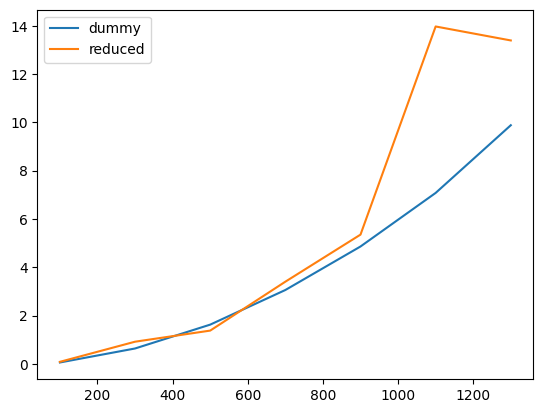

In [10]:
fig, ax = plt.subplots()

# ax.plot(grid_list, time_fast, label='fast')
ax.plot(grid_list, time_dummy, label='dummy')
ax.plot(grid_list, time_reduced, label='reduced')
ax.legend()
plt.show()
